In [8]:
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
#upload the X and y data of MAI files
input0 = files.upload()
input = pd.read_csv(io.BytesIO(input0['mai_monthly_data_processed.csv']))
output0 = files.upload()
output = pd.read_csv(io.BytesIO(output0['mkt_monthly_data_processed.csv']))
#select the needed features and variable out of the file
X_mai = input.iloc[:,1:9]
y_mai = output.lead_GSPCprem_1

Saving mai_monthly_data_processed.csv to mai_monthly_data_processed.csv


Saving mkt_monthly_data_processed.csv to mkt_monthly_data_processed.csv


In [11]:
# Function: split data into training and test set based on the random state

def split_data(X, y, test_size, random_state):
    X_train,X_test,y_train,y_test=train_test_split(X_mai,y_mai,test_size=test_size,random_state=random_state)
    return X_train, y_train, X_test, y_test

In [33]:
# Function: build the neural network model

def train_neural_network(X, y):
    """
    Parameters:
    - X: MAI features
    - y: Target variable

    Returns:
    - Trained model
    - Model training history
    """

    # the best number of layers, dropout layers, the best number of units of a layer have been selected
    model = keras.Sequential([
    layers.Dense(64, activation=keras.layers.ELU(),input_dim=8),
    Dropout(0.3),
    layers.Dense(32, activation=keras.layers.ELU()),
    Dropout(0.5),
    layers.Dense(1)  # Output layer with 1 neuron for numerical output
    ])

    # Compile the model
    # the best optimizer and learning rate have been selected
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    # the best number of epochs and batch_size have been selected
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Plot training and validation accuracy over epochs
    plt.plot(history.history['loss'], label='Training MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model, history

In [44]:
#Function: evaluate the performance of the model and show the values in plot
def test_model(model, X_test, y_test):
    """
    Test a trained model and calculate regression metrics.

    Parameters:
    - model: Trained model
    - X_test: Testing features
    - y_test: True values for testing

    Returns:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R-squared (R2) score
    """

    # Make y_pred using the trained model
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Plot predicted values and true values

    new_y_test = [value for index, value in enumerate(y_test)]
    plt.plot(new_y_test, label='True',color='blue')
    plt.plot(y_pred, label='Prediction',color='red')

    # 添加标签和标题
    plt.xlabel('Index')
    plt.ylabel('y values')
    plt.title('True vs Pred')

    plt.legend()

    plt.show()

    return MSE, MAE, R2


Epoch 1/10
9/9 [==============================] - 2s 27ms/step - loss: 1249.0140 - mae: 26.6575 - val_loss: 1772.7228 - val_mae: 28.7092
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 1255.8344 - mae: 26.7589 - val_loss: 1772.6310 - val_mae: 28.7083
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 1244.4347 - mae: 26.7128 - val_loss: 1772.5471 - val_mae: 28.7079
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 1241.7903 - mae: 26.7528 - val_loss: 1772.6271 - val_mae: 28.7094
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 1247.8239 - mae: 26.7344 - val_loss: 1772.6805 - val_mae: 28.7101
Epoch 6/10
9/9 [==============================] - 0s 11ms/step - loss: 1240.9215 - mae: 26.6562 - val_loss: 1772.9087 - val_mae: 28.7126
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 1252.0381 - mae: 26.7081 - val_loss: 1773.1736 - val_mae: 28.7160
Epoch 8/10
9/9 [==============================

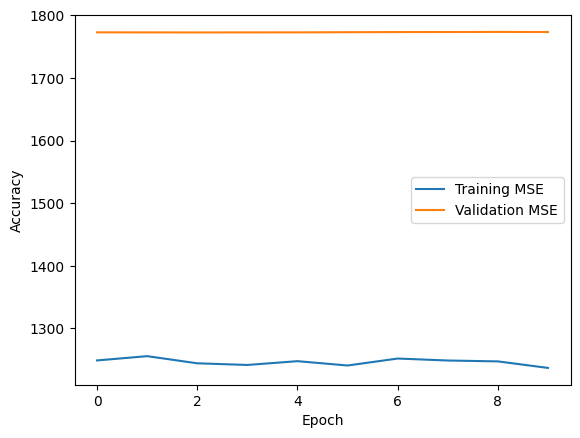

3/3 [==============================] - 0s 5ms/step


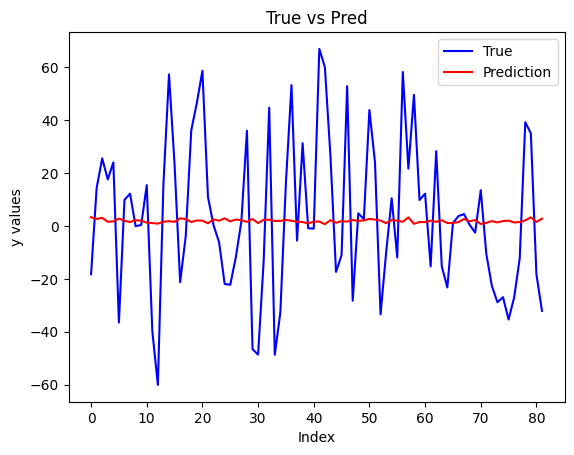

MSE: 860.8501419943041, MAE: 23.72357851551121, R2: -0.00519387250243164


In [45]:
# Generate training and test data sets
X_train, y_train, X_test, y_test = split_data(X_mai, y_mai, 0.2, 0)

# Use X_train and y_train as MAI features and target variable
trained_model, training_history = train_neural_network(X_train, y_train)

# Have the performance of the trained model evaluated on the test set
MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
print(f'MSE: {MSE}, MAE: {MAE}, R2: {R2}')